# Week 5 assignment

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sympy import *
init_printing(use_unicode = True, fontsize = 16)
pi2 = pi * 2

In [3]:
import os
import sys 

if os.name == 'nt':
    path = 'C:\\Users\\Wei\\Dropbox\\Coding\\notebooks\\專案\\待處理\\Waves\\bitbucket\\github\\codes'
else:
    path = '/home/wei/Dropbox/Coding/notebooks/專案/待處理/Waves/bitbucket/github/codes'
    
sys.path.append(path)

from waves.sound import *
from waves.tools.dsp import *

# 1. 
DTFT, Time-stretch, radio modulation,  Envelope detection 

In [4]:
x, y, M = symbols('x y M')
y = Piecewise((x, x<=M), (M, True))
y

⎧x  for M ≥ x
⎨            
⎩M  otherwise

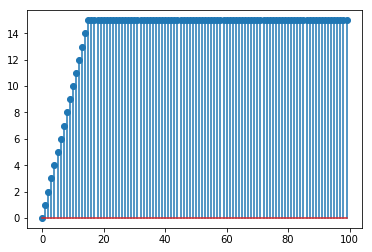

In [5]:
f = lambdify((x, M), y, 'numpy')
n = np.arange(100)
plt.stem(n, f(n, 15));

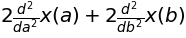

In [6]:
a, b, t = symbols('a b t')
x = Function('x')
y = Function('y')

y = diff(x(t), t, t) + diff(x(t), t, t)
y.subs(t, a) + y.subs(t, b) 

# 2. 
time-stretch, Envelope detection, DTFT, clipping, AM modulation, 

# 3. 
Causal, BIBO stable

In [7]:
n, h, N = symbols('n h N')
h = Piecewise((1, (0<=n) & (n<=N)), (0, True))
h

⎧1  for N ≥ n ∧ n ≥ 0
⎨                    
⎩0      otherwise    

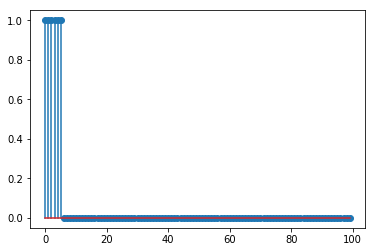

In [8]:
f = lambdify((n, N), h, 'numpy')
n = np.arange(100)
impulse_response = f(n, 5)
plt.stem(n, impulse_response);

# 4.
0 1 0 0 

In [9]:
max_idx = 10
n = np.arange(-5, max_idx)

def delta(n):
    return  (n == 0).astype(int)

h = delta(n) - delta(n-1)
x = np.zeros(len(n))
x[n>=0] = 1
y = Convolver.convolve(x, h)

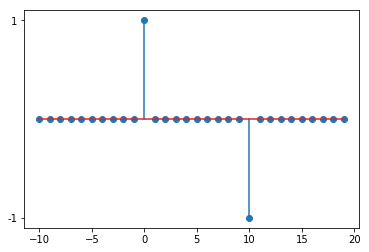

In [10]:
plt.stem(np.arange(len(y)) - max_idx, y)
plt.yticks((-1, 1), (-1, 1));

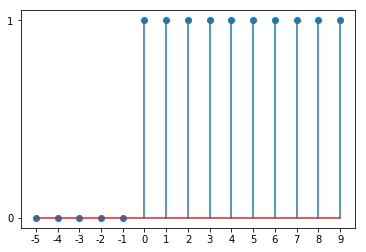

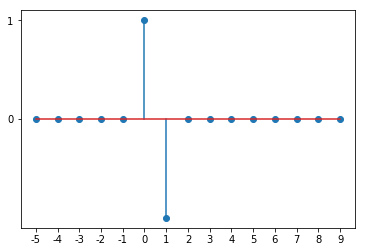

In [11]:
plt.stem(n, x)
plt.yticks((0, 1), (0, 1))
plt.xticks(n, n)
plt.show()

plt.stem(n, h) 
plt.yticks((0, 1), (0, 1))
plt.xticks(n, n)
plt.show()

# 5. 
0 0 1 1

In [12]:
max_idx = 10
n = np.arange(-5, max_idx)
h = delta(n) - delta(n-1) 
x = n.copy()
x[n<0] = 0
y = Convolver.convolve(x, h)

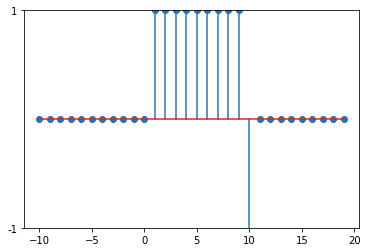

In [13]:
plt.stem(np.arange(len(y)) - max_idx, y)
plt.ylim((-1, 1))
plt.yticks((-1, 1), (-1, 1));

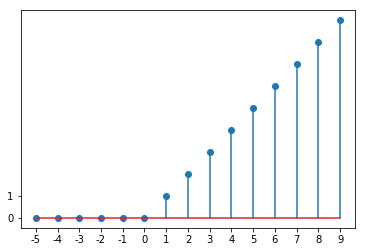

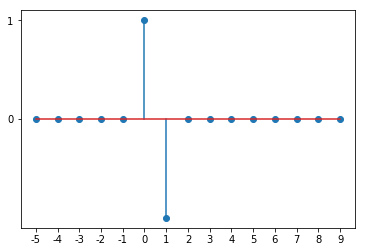

In [14]:
plt.stem(n, x)
plt.yticks((0, 1), (0, 1))
plt.xticks(n, n)
plt.show()

plt.stem(n, h) 
plt.yticks((0, 1), (0, 1))
plt.xticks(n, n)
plt.show()

# 6. 

Any filter $h[n]$ with finite support and bounded coefficients.


The moving average: $h[n]=\frac{\delta[n]+\delta[n-1]}{2}$

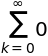

In [15]:
class Delta(Function):    
    @classmethod
    def eval(cls, x):
        x = np.asarray(x)
        return  (x == 0).astype(int)
    
k, n = symbols('k n') 
n = Symbol('n', integer = True)
h = Sum(1/(k+1)*Delta(n - k), (k, 0, infty))
# h =  Delta(n) 
h

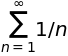

In [16]:
y = Sum(1/n, (n, 1, oo))
y
# y.evalf()  # Sum diverges

In [17]:
# idx = np.arange(100) 
# f = lambdify((n), h, 'numpy') 
# impulse_response = f(idx)
# impulse_response
# # plt.stem(n, impulse_response);

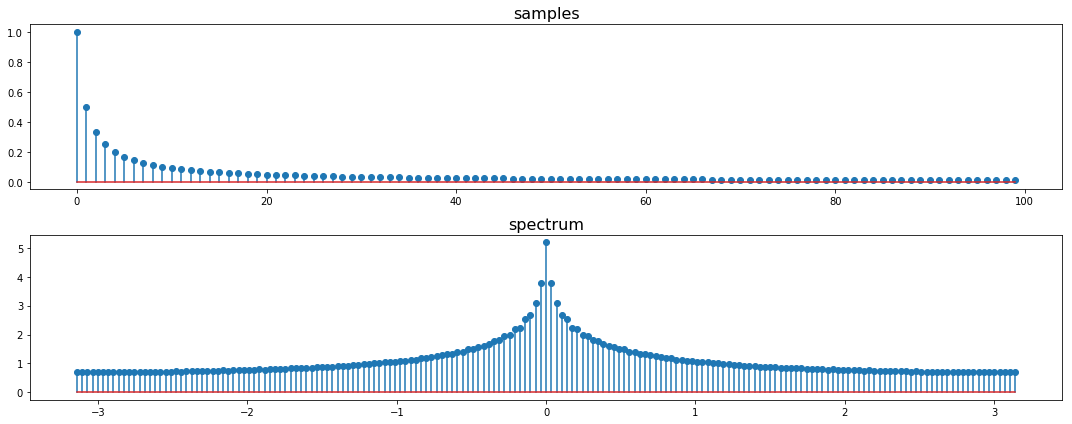

In [18]:
n = np.arange(100) 
h = 1/(n+1)
H = Fourier.dtft(h)

# 7.


In [19]:
def conv_deconv(x, h):
    y = Convolver.convolve(x, h)
    h1 = Convolver.deconvolve(x, y)
    y1 = Convolver.convolve(x, h1)

    plt.stem(y)
    plt.title('Convolved', fontsize = 16)
    plt.show()
    plt.stem(y1)
    plt.title('Re-convolved', fontsize = 16)
    plt.tight_layout()
    plt.show()

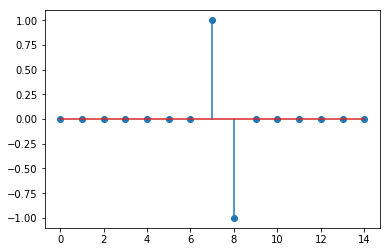

In [20]:
x = np.array([ 0., 0., 0., 0., 0., 0., 0., 1., -1., 0., 0., 0., 0., 0., 0.])
plt.stem(x);

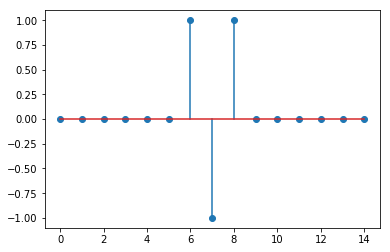

In [21]:
y = y = np.array([ 0., 0., 0., 0., 0., 0., 1., -1., 1., 0., 0., 0., 0., 0., 0.])
plt.stem(y);

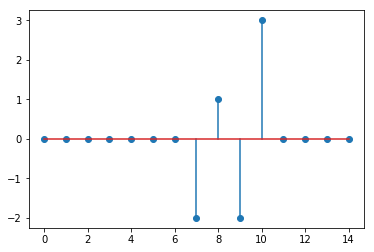

In [22]:
x1 = np.array([ 0., 0., 0., 0., 0., 0., 0., -2., 1., -2., 3., 0., 0., 0., 0.])
plt.stem(x1); 

In [23]:
h = Convolver.deconvolve(x, y)
h

array([1., 0., 1., 1., 1.])

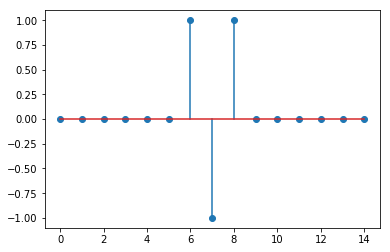

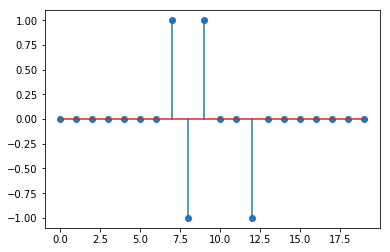

In [24]:
plt.stem(y)
plt.show()

y_hat = Convolver.convolve(x, h)
plt.stem(y_hat);

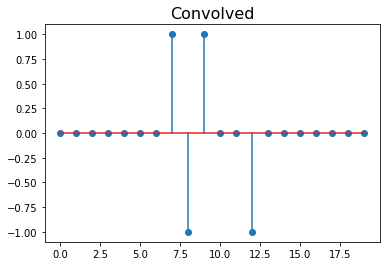

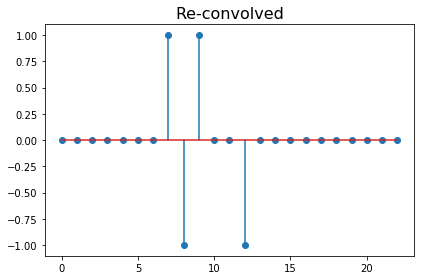

In [25]:
conv_deconv(x, h)

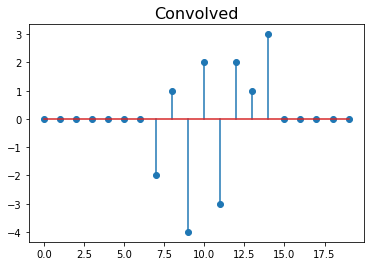

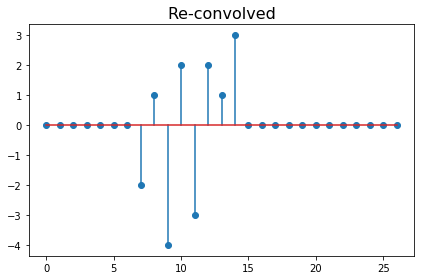

In [26]:
conv_deconv(x1, h)

# 8.
pi/2

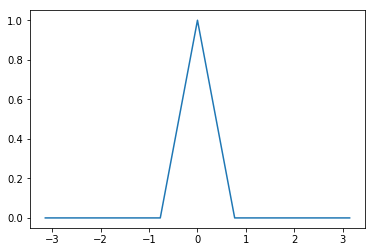

In [27]:
w = DSP.get_freq_bins(FREQ_BINS)
X = np.zeros_like(w)

idx =  np.where((-np.pi/4 <= w) & (w <= 0))[0]
X[idx] = np.linspace(0, 1, len(idx))

idx =  np.where((0 <= w) & (w <= np.pi/4))[0]
X[idx] = np.linspace(1, 0, len(idx))

plt.plot(w, X);

/home/wei/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


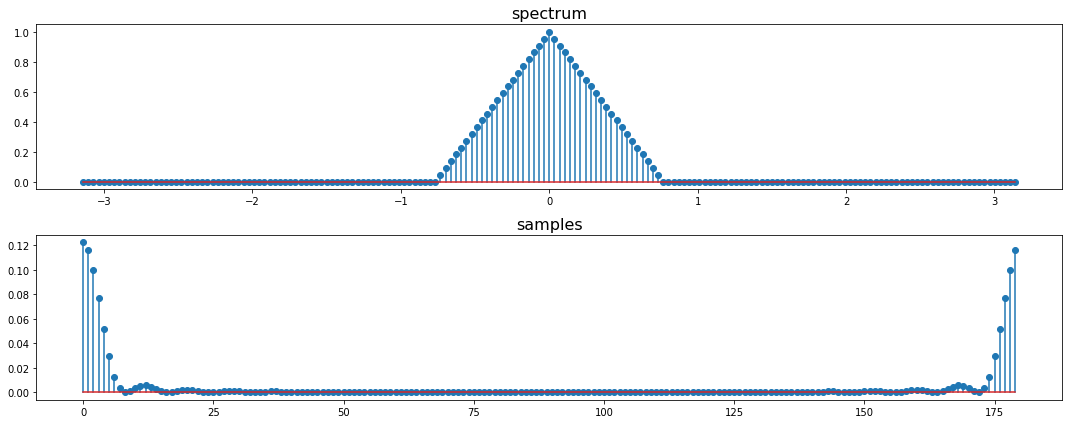

In [28]:
x = Fourier.idtft(X)

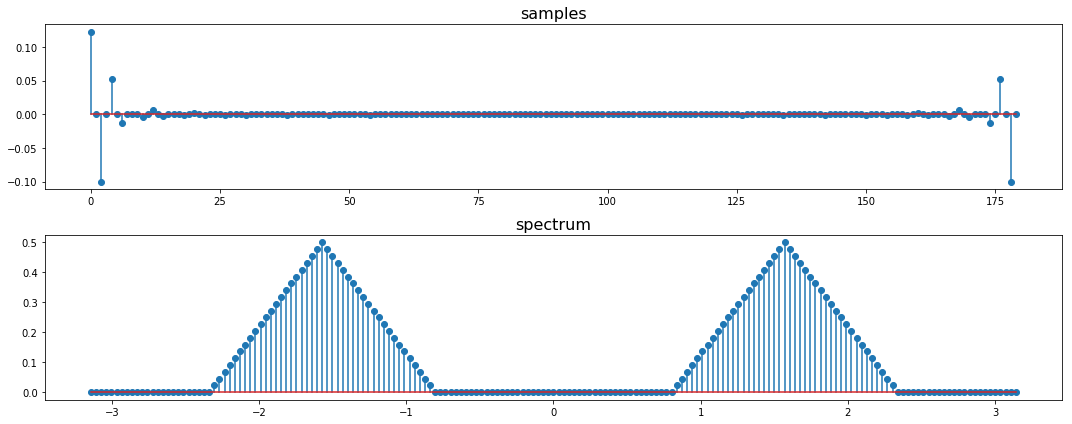

In [29]:
x1 = np.cos(np.pi/2*np.arange(len(x)))*x
X1 = Fourier.dtft(x1)

# 9.
0.6*cos(pi/5*n) + 0.5*sin(pi/4*n)

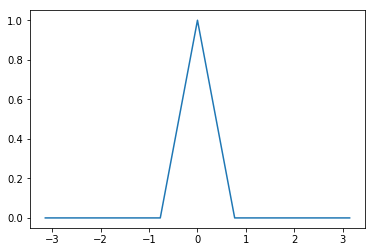

In [30]:
w = DSP.get_freq_bins(FREQ_BINS)
H = np.zeros_like(w)

idx =  np.where((-np.pi/2 <= w) & (w <= 0))[0]
H[idx] = np.linspace(0, 1, len(idx))

idx =  np.where((0 <= w) & (w <= np.pi/2))[0]
H[idx] = np.linspace(1, 0, len(idx))

plt.plot(w, X);

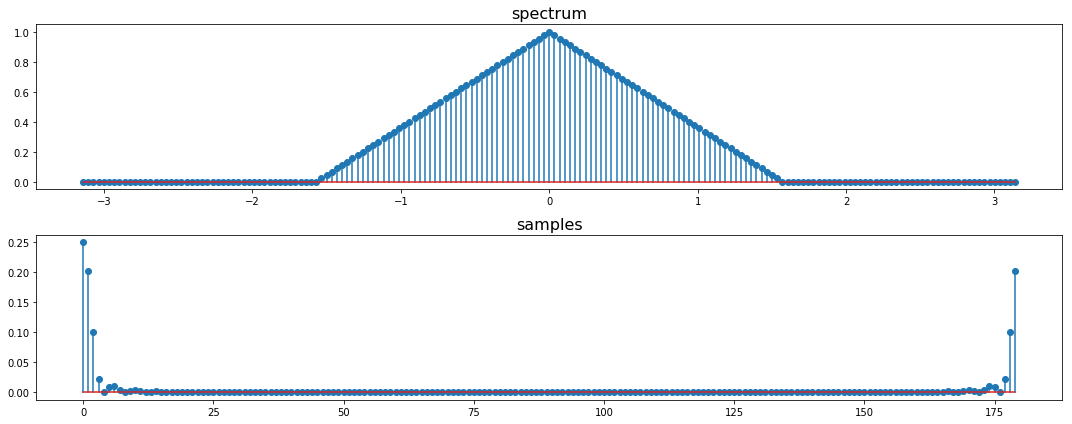

In [31]:
h = Fourier.idtft(H)

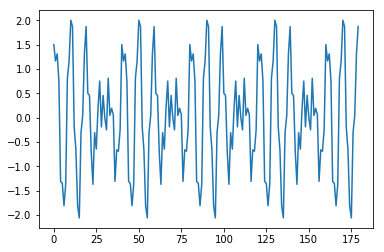

In [32]:
n = np.arange(N_SAMPLES)
x = np.cos(np.pi/5*n) + np.sin(np.pi/4*n) + 1/2*np.cos(3*np.pi/4*n)
# x = np.cos(np.pi/5*n)
# x = np.sin(np.pi/4*n) 
# x = 1/2*np.cos(3*np.pi/4*n)
plt.plot(n, x);

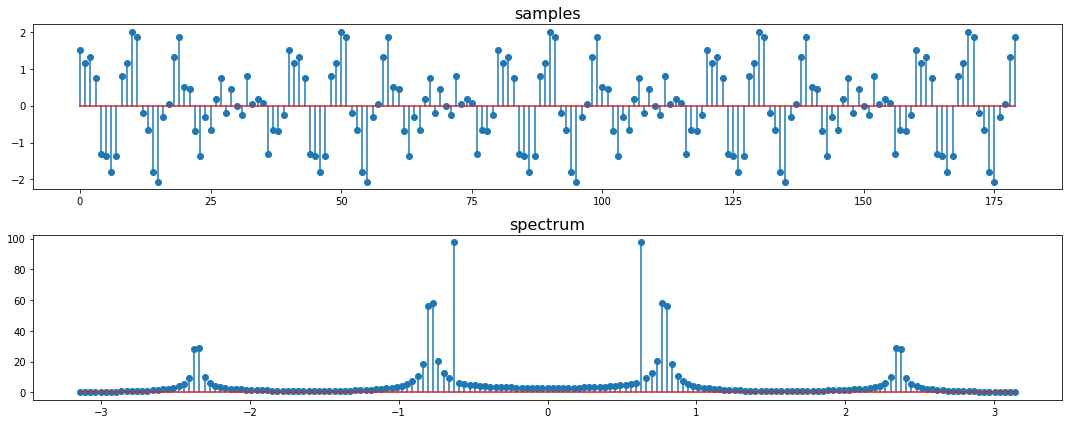

In [33]:
X = Fourier.dtft(x)

In [34]:
def get_anergy(p, base):
    x = (base - p) / base 
    return x
    
get_anergy(np.pi/5, np.pi/2)

In [35]:
get_anergy(np.pi/4, np.pi/2)

# 10.
0

In [36]:
x =  np.array([1, 1, 1])
h =  np.array([3, 2, 1])
h1 = np.flip(h)

In [37]:
y = Convolver.convolve(Convolver.convolve(x, h), h1)
y

array([ 3., 11., 25., 30., 25., 11.,  3.,  0.,  0.])

```
h =       [h0, h1, h2]
h1_flip =         [h0, h1, h2]
h1 =      [h2, h1, h0]
h*h1 = [[h0*h2],
        [h0*h1 + h1*h2],
        [h0*h0 + h1*h1 + h2*h2],
        [h1*h0 + h2*h1],
        [h2*h0]]
```

In [38]:
hh1 = Convolver.convolve(h, h1)
hh1

array([ 3.,  8., 14.,  8.,  3.,  0.])

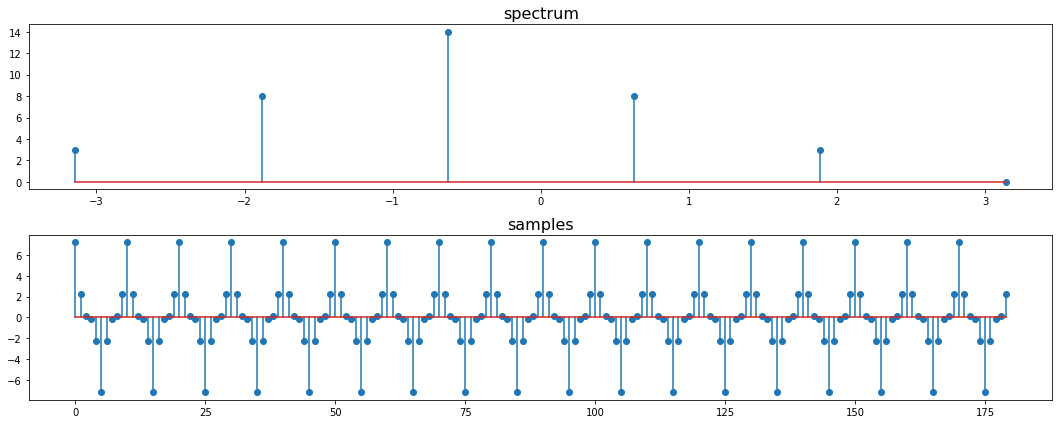

In [39]:
HH1 = Fourier.idtft(hh1)

In [40]:
Convolver.convolve(x, hh1)

array([ 3., 11., 25., 30., 25., 11.,  3.,  0.,  0.])

In [41]:
n = np.arange(100)
alpha = 0.9

h = alpha**n
h = np.cos(np.pi/4*n)

h1 = np.flip(h)

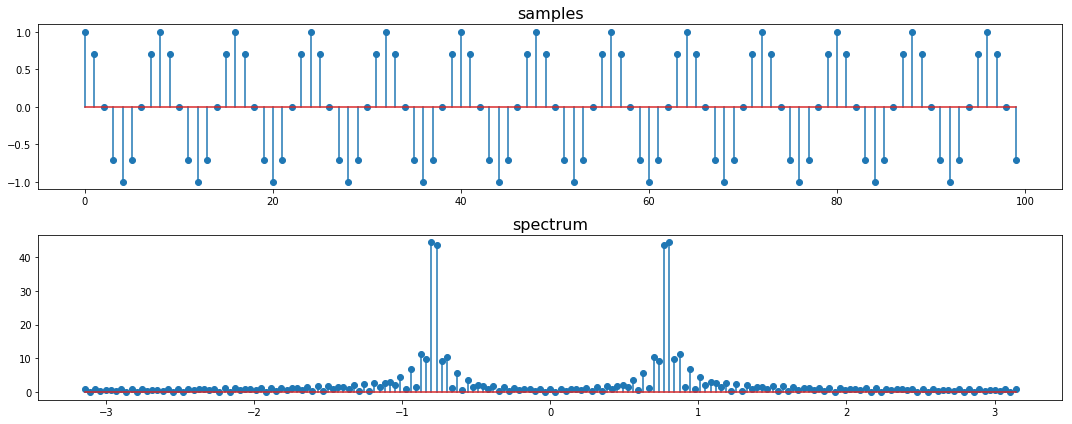

In [42]:
H = Fourier.dtft(h)

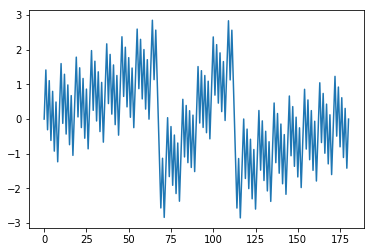

In [43]:
phases = np.angle(H)
plt.plot(phases);

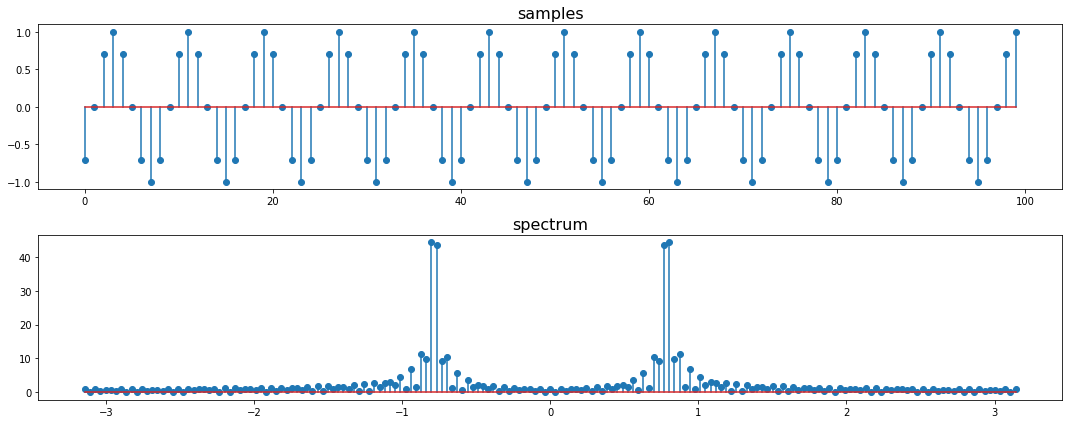

In [44]:
H1 = Fourier.dtft(h1)

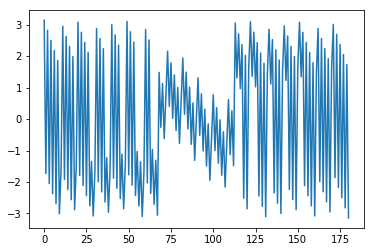

In [45]:
phases = np.angle(H1)
plt.plot(phases);

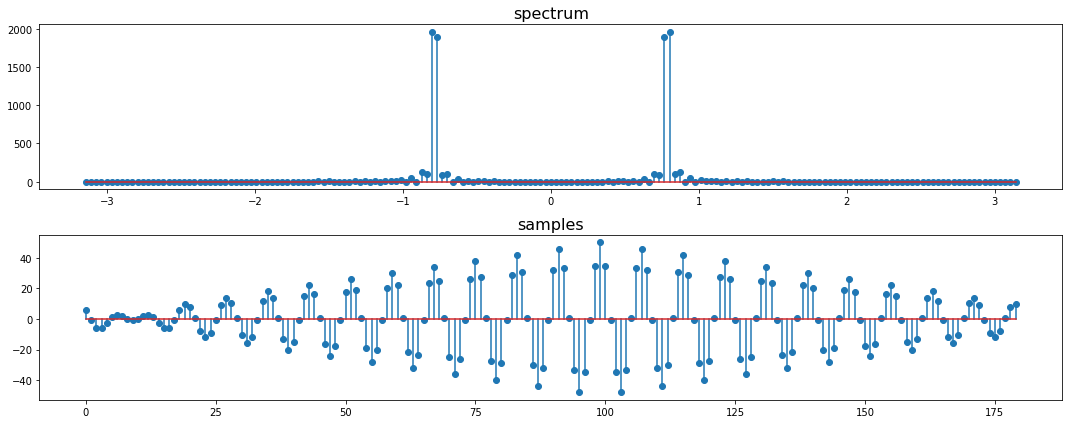

In [46]:
hh1 = Fourier.idtft(H*H1)

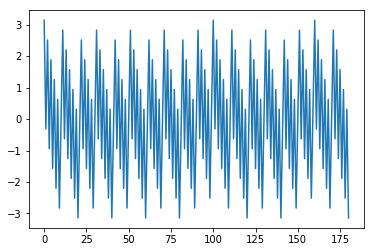

In [47]:
phases = np.angle(H*H1)
plt.plot(phases);

# 11. 
0

In [48]:
n_samples = N_SAMPLES
n = np.arange(n_samples)

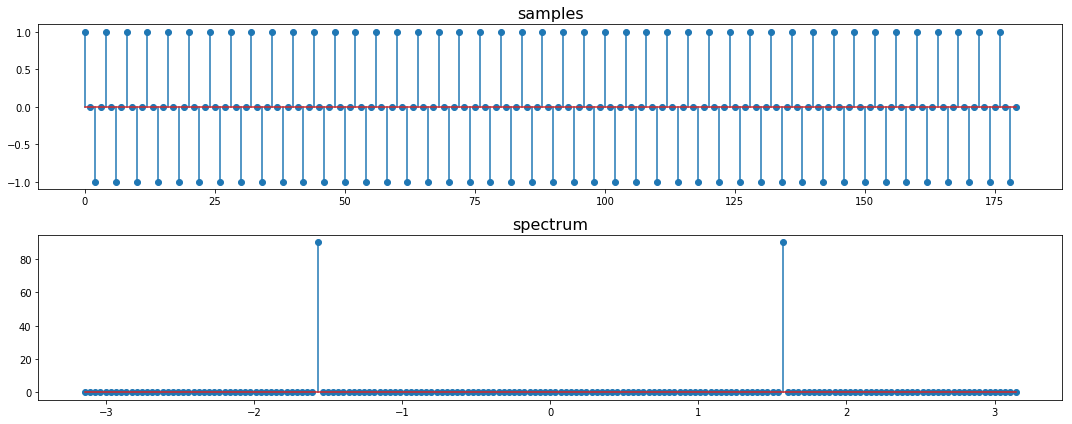

In [49]:
x = np.cos(np.pi/2*n)
X = Fourier.dtft(x)

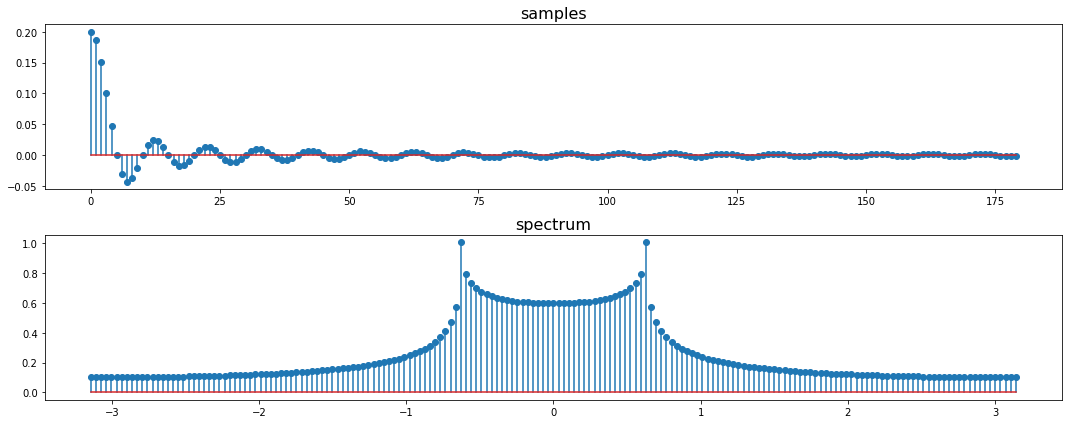

In [50]:
h = 1/5*np.sinc(n/5)
H = Fourier.dtft(h)

### 直接用 DTFT 係數相乘 會得出不正確的結果

(0.10730986496005016+8.009279128879995e-16j)

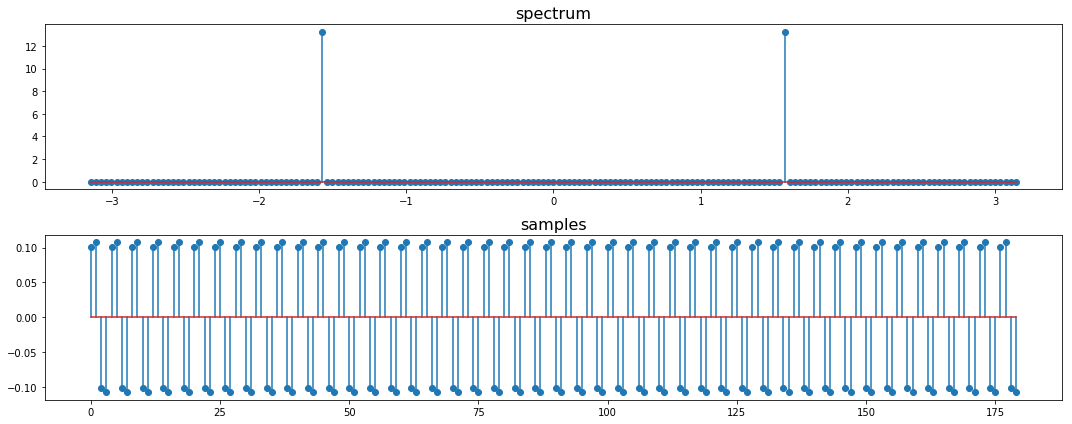

In [51]:
y = Fourier.idtft(X * H)
y[5]

### X 的能量集中在 $-\frac{\pi}{2}，\frac{\pi}{2}$ ，且為 1，其他頻率上的能量皆為 0

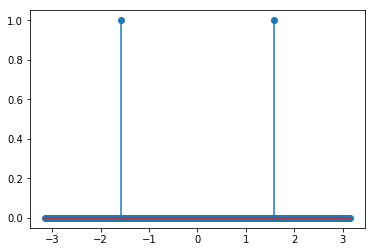

In [52]:
w = DSP.get_freq_bins()
X = np.zeros_like(w)
idx = np.where(abs(w) == np.pi/2)[0]
X[idx] = 1
plt.stem(w, X);

### 計算 H 在 $-\frac{\pi}{2}，\frac{\pi}{2}$ 的能量

In [53]:
n = np.arange(n_samples)
w = DSP.get_freq_bins()
H = np.zeros_like(w)

In [54]:
w0 = -np.pi/2
H_w = np.sum(np.exp(-1j*w0*n) * np.sinc(n/5)/5)
idx = np.where(w == w0)[0]
H[idx] = H_w

/home/wei/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


In [55]:
w0 = np.pi/2
H_w = np.sum(np.exp(-1j*w0*n) * np.sinc(n/5)/5)
idx = np.where(w == w0)[0]
H[idx] = H_w

/home/wei/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


(3.423647903687735e-19+0j)

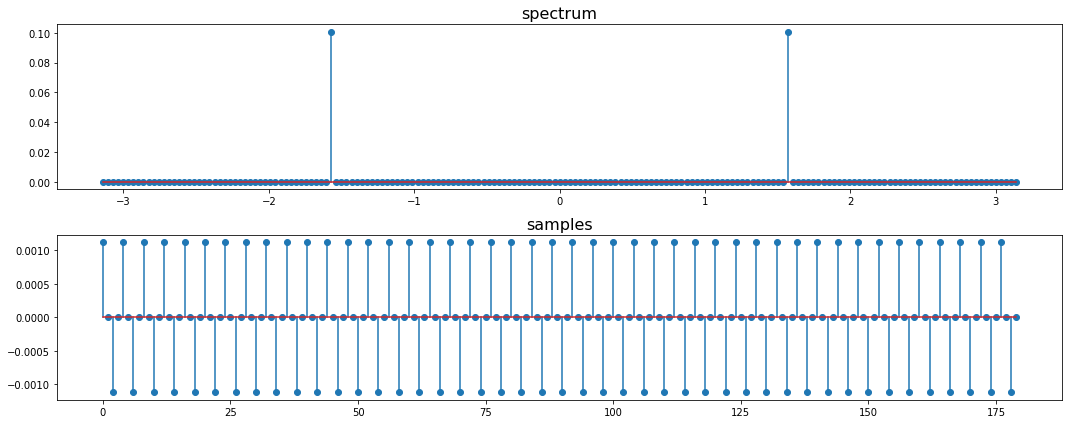

In [56]:
y = Fourier.idtft(H)
y[5]

(3.423647903687735e-19+0j)

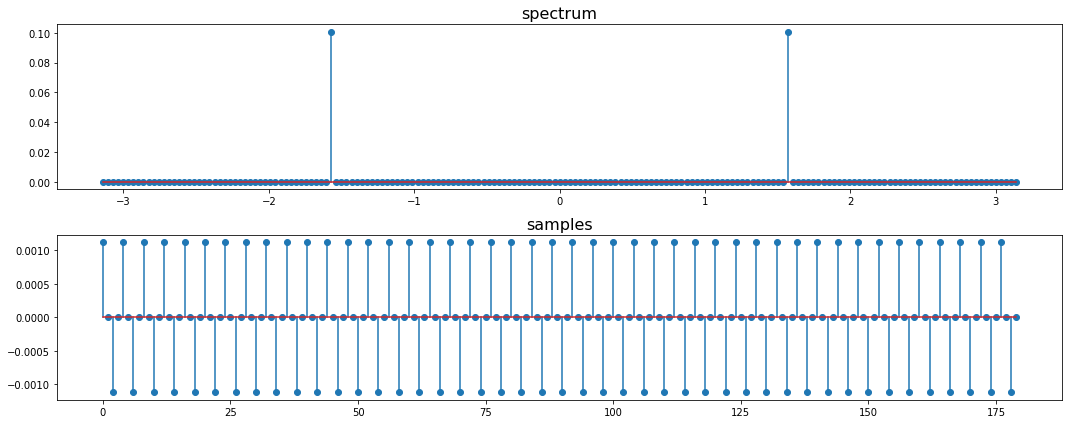

In [57]:
y = Fourier.idtft(X * H)
y[5]

In [58]:
np.round(y[5], 4)

0j

In [59]:
h, H, w, wc, n = symbols('h H w wc n') 
# wc = pi
h = 1/pi2 * integrate(E**(I*w*n), (w, -wc, wc))
h = h.rewrite(sin).simplify()
h

# Sinc 是 -wc~wc 中各 frequency 成分的加總

⎧sin(n⋅wc)                            
⎪─────────  for n > -∞ ∧ n < ∞ ∧ n ≠ 0
⎪   π⋅n                               
⎨                                     
⎪   wc                                
⎪   ──              otherwise         
⎩   π                                 

# 12.
x2 is not modified by the system while x1 is eliminated.

![](https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/LTCWvmnNEeaPLRIThVfRHQ_ef1522a4c26ef88ae0ba5f55dbde8872_Q2.png?expiry=1540598400000&hmac=ilAIhESoWEv1P60wGTQNbRRkEBebgzBX-Q6cVQ97bzs)

In [60]:
def process(x, h, H_filter):
    x = x * h
    X = Fourier.dtft(x)

    Y = X * H_filter
    y = Fourier.idtft(Y, n_samples = N_SAMPLES)

    y = y * h
    Y = Fourier.dtft(y)
    
    return y

# def plot_comparison(data_series, row_hight = 3):
#     n = len(data_series)
    
#     fig, axs = plt.subplots(n, 1, figsize = (15, n * row_hight))

#     for i in range(n):
#         axs[i].stem(data_series[i])

#     plt.tight_layout()
#     plt.show()

In [61]:
n = np.arange(N_SAMPLES)
h = (-1)**n

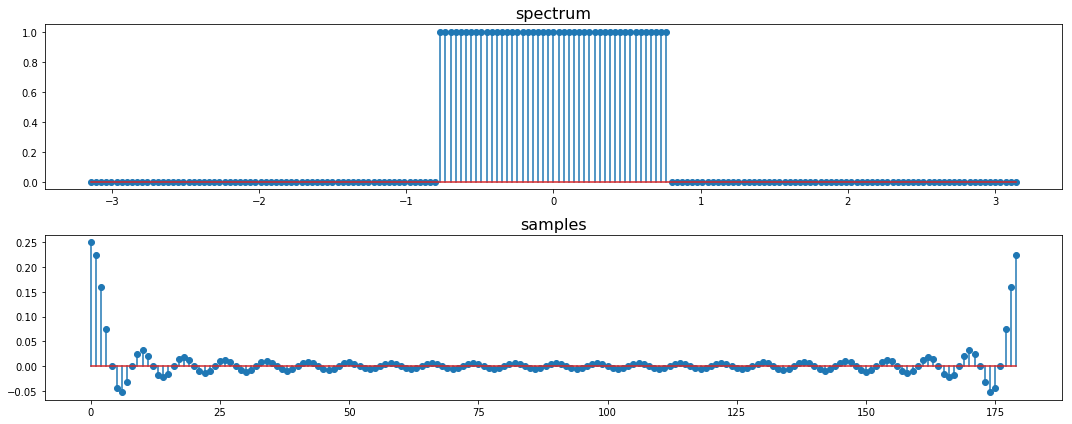

In [62]:
H_low_pass = Filter.low_pass_filter_frequency_response(cutoff_ratio = 1/4, freq_bins = FREQ_BINS)
h_low_pass = Fourier.idtft(H_low_pass, n_samples = N_SAMPLES)

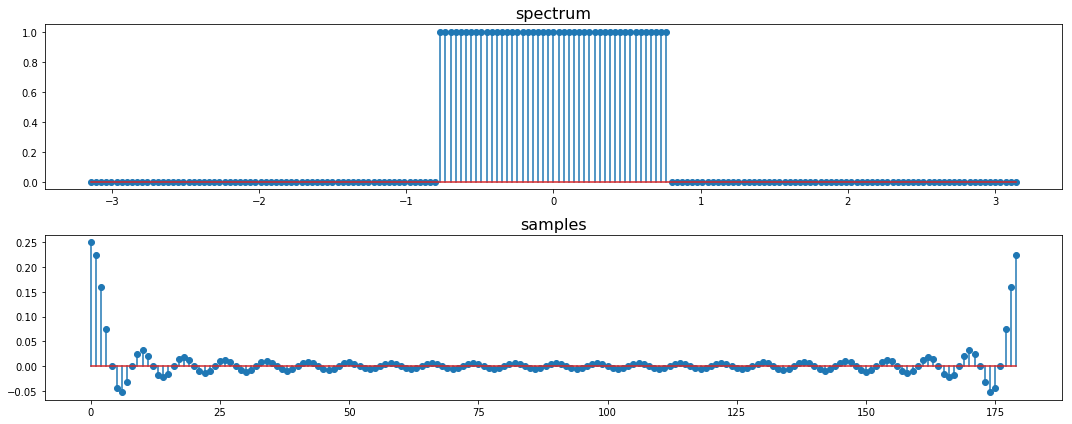

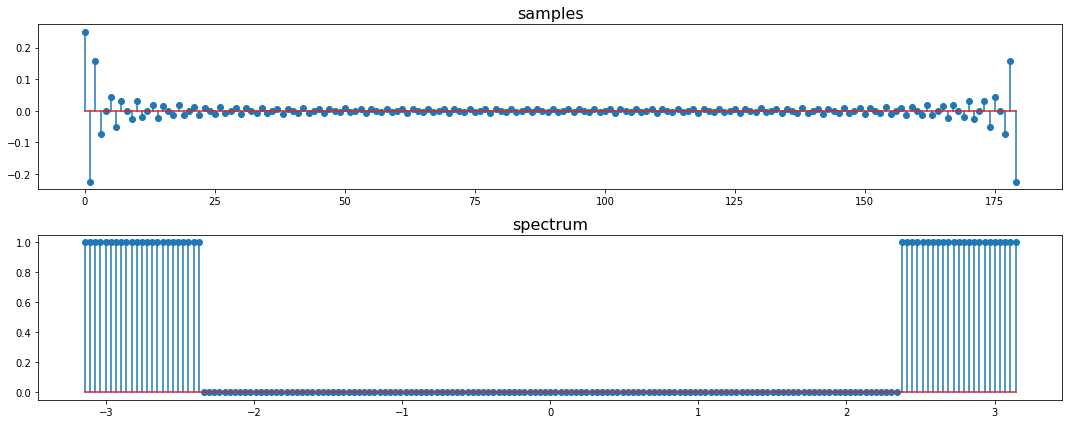

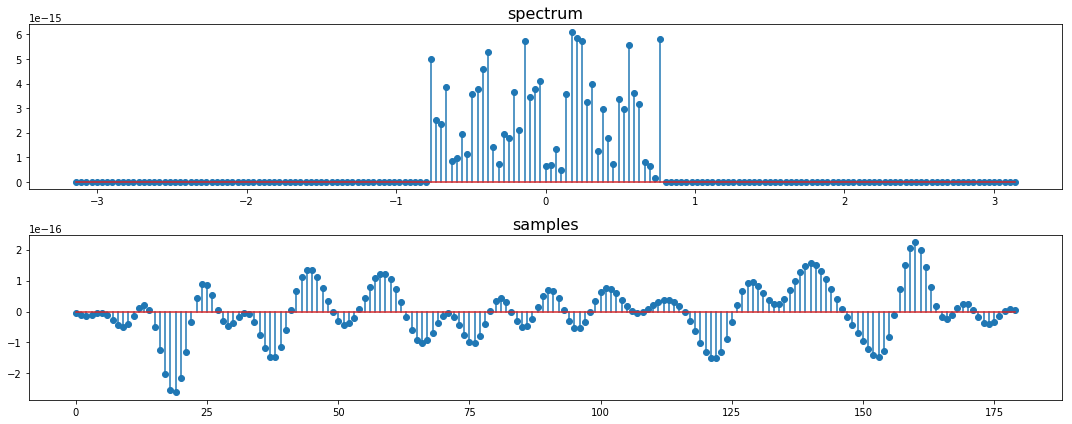

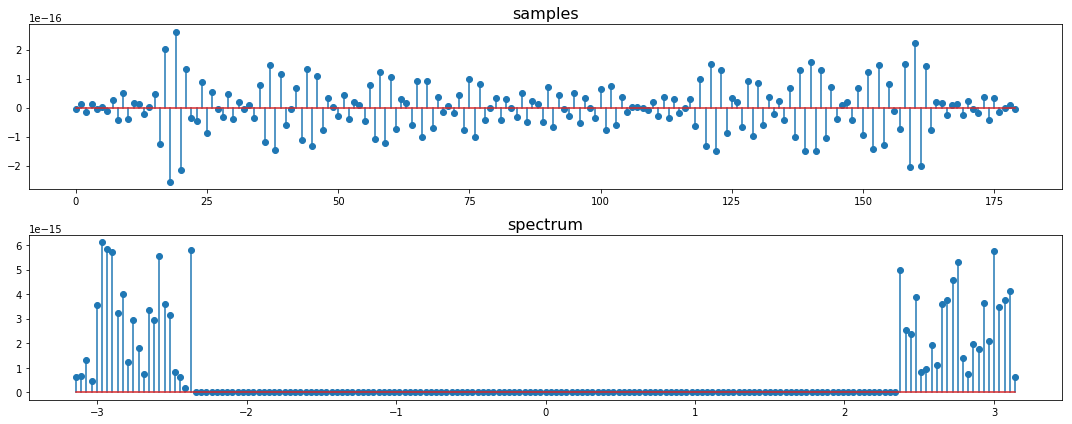

In [63]:
X1 = Filter.low_pass_filter_frequency_response(cutoff_ratio = 1/4, freq_bins = FREQ_BINS)
x1 = Fourier.idtft(X1, n_samples = N_SAMPLES)
y1 = process(x1, h, H_low_pass)

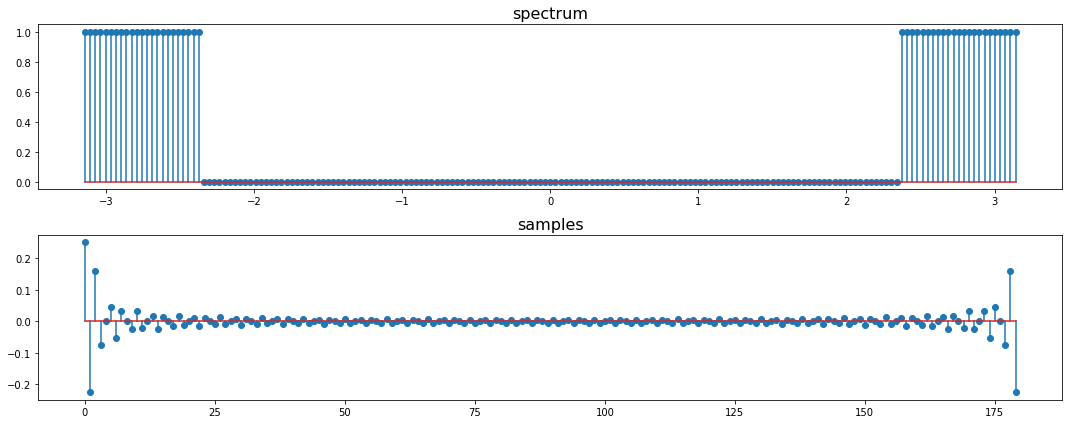

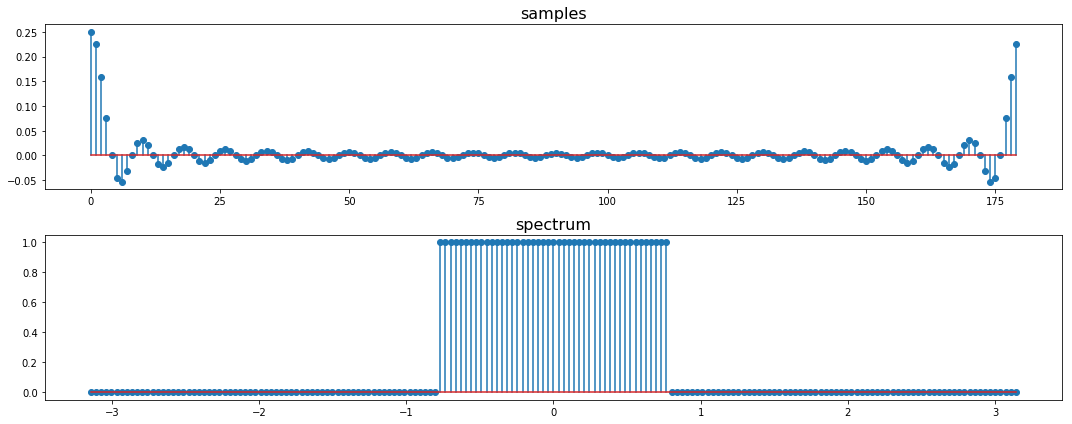

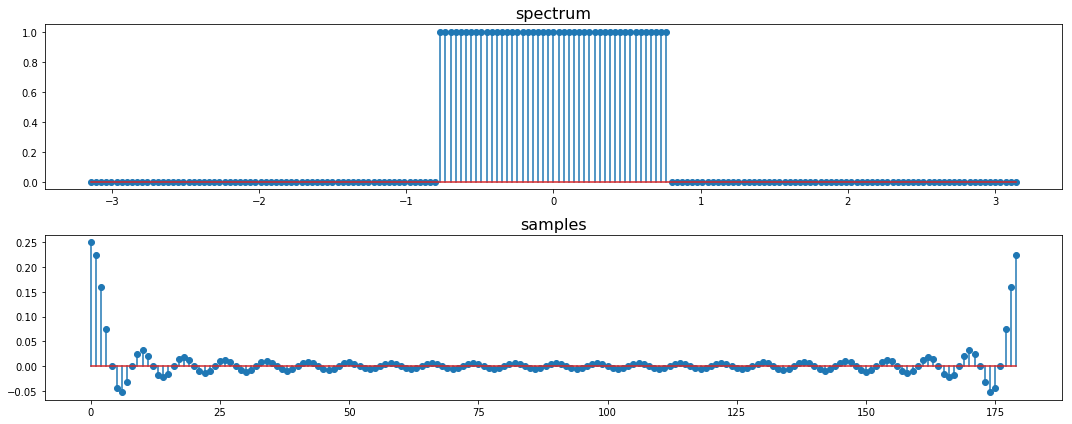

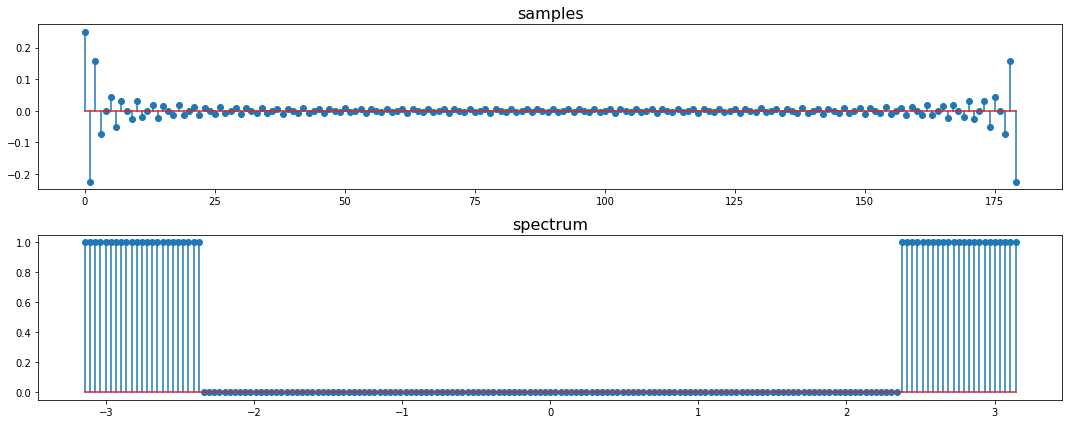

In [64]:
X2 = Filter.band_pass_filter_frequency_response(center = 7/8, cutoff_ratio = 1/8, freq_bins = FREQ_BINS)
x2 = Fourier.idtft(X2, n_samples = N_SAMPLES)
y2 = process(x2, h, H_low_pass)

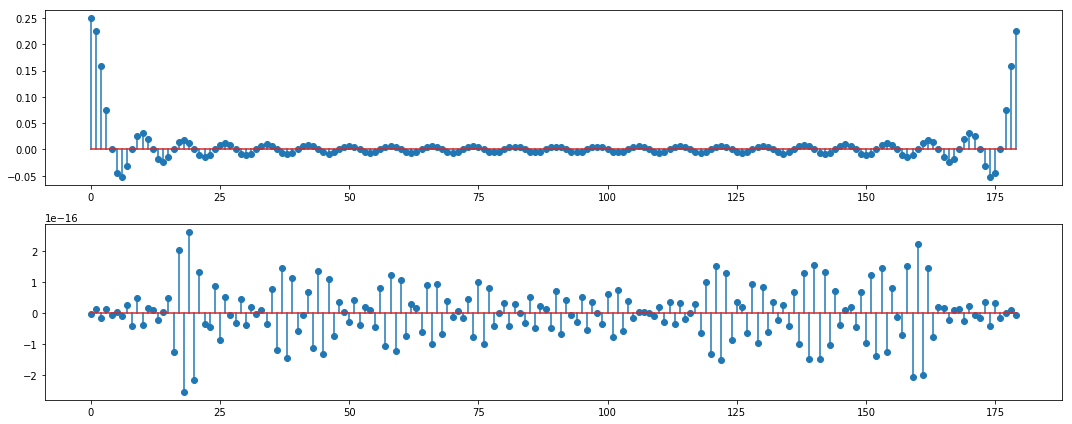

In [65]:
DSP.plot_comparison((x1, y1))

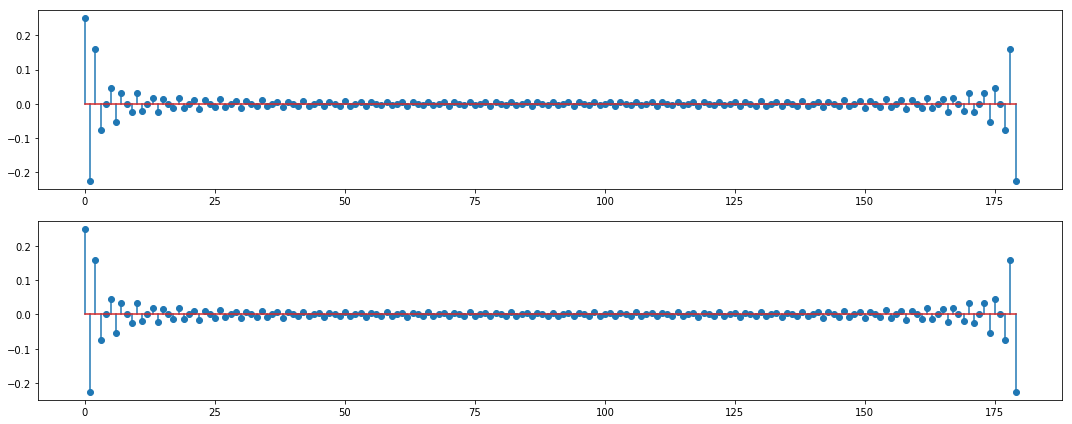

In [66]:
DSP.plot_comparison((x2, y2))

# 13.
$$
\frac{1}{2\pi} \int_{\omega = -\pi}^{\pi} X(e^{j\omega}) Y(e^{-j\omega}) d\omega 
$$

$$
\begin{align}
x[n] &= \frac{1}{2\pi}\int_{-\pi}^{\pi} X(e^{j\omega})e^{j\omega n}d\omega  \\
y[n] &= \frac{1}{2\pi}\int_{-\pi}^{\pi} Y(e^{j\omega})e^{j\omega n}d\omega  \\
y*[n] &= \frac{1}{2\pi}\int_{-\pi}^{\pi} Y(e^{j\omega})e^{-j\omega n}d\omega  \\
\sum_{n=-\infty}^{\infty} x[n]\bar{y}[n] &= \sum_{n=-\infty}^{\infty} \frac{1}{2\pi}\int_{-\pi}^{\pi} X(e^{j\omega})e^{j\omega n}d\omega * \frac{1}{2\pi}\int_{-\pi}^{\pi} Y(e^{j\omega})e^{-j\omega n}d\omega  \\
\end{align}
$$

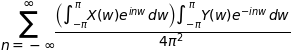

In [67]:
w, n = symbols('w n')
X = Function('X')
Y = Function('Y')

xy = Integral(X(w)*E**(I*w*n), (w, -pi, pi))/pi2 *  Integral(Y(w)*E**(-I*w*n), (w, -pi, pi))/pi2  
result = Sum(xy, (n, -oo, oo))
result

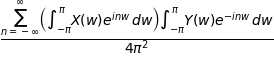

In [68]:
result.simplify()

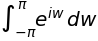

In [69]:
xy = Integral(E**(I*w), (w, -pi, pi))
xy

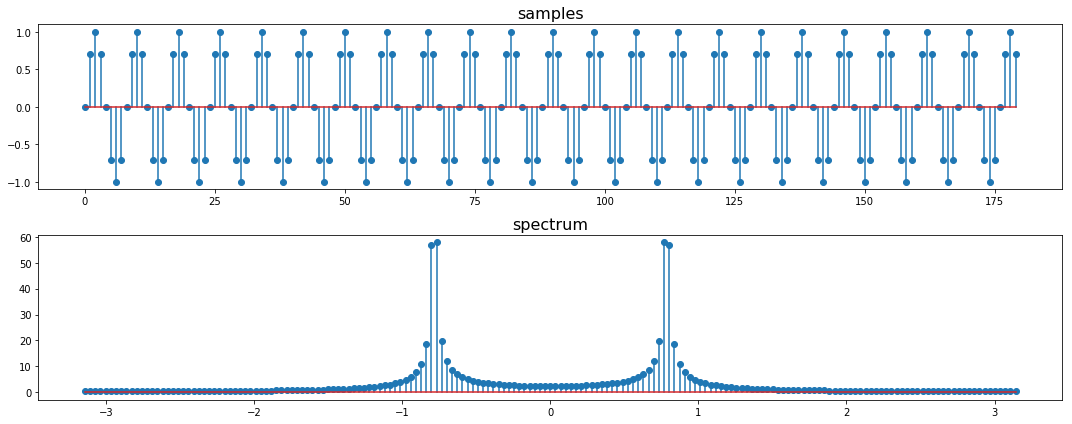

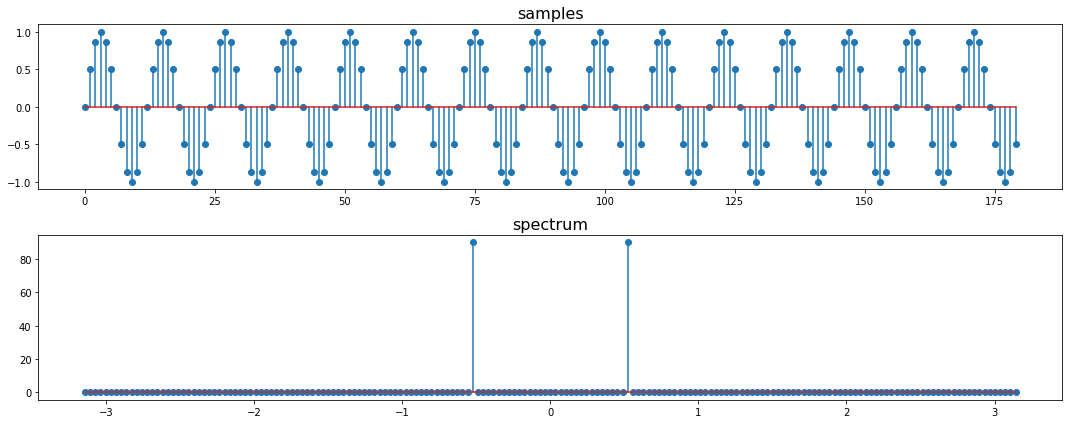

In [70]:
n = np.arange(N_SAMPLES)
x = np.sin(np.pi/4 *n)
y = np.sin(np.pi/6 *n)
X = Fourier.dtft(x)
Y = Fourier.dtft(y)

In [71]:
np.sum(x*y)

In [72]:
np.sum(X*Y)

(-1.513740156280524e-11+9.265477274311706e-12j)

# 14. 
A highpass filter with gain $\frac{1}{4}$ and cutoff frequency $\omega_c$

![](https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/CPe21WnOEeaCzBKExvAzbQ_2fc4fadae9051ac5ad88866cae8dad55_Q3.png?expiry=1540598400000&hmac=DhfwYRsxlCBrcUpgxsZ-0nm1nsbEgC0bsQ9ocnpGBbI)

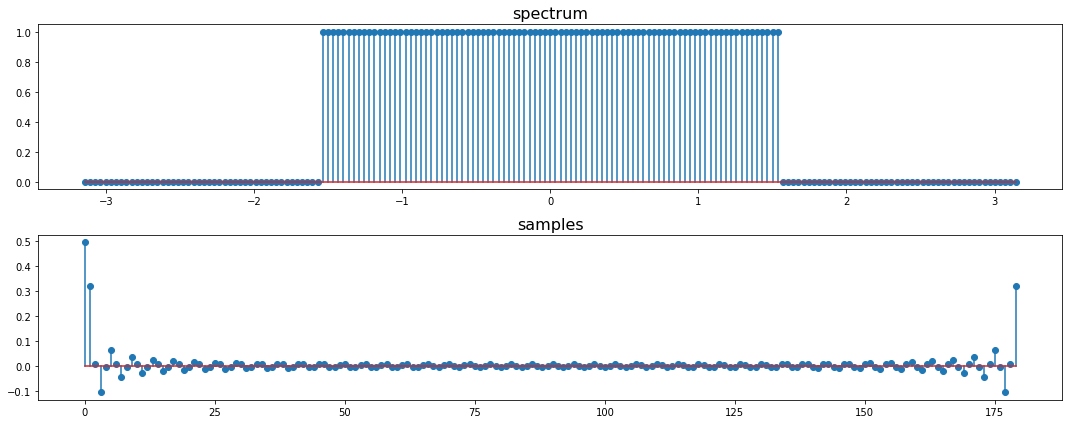

In [73]:
H = Filter.low_pass_filter_frequency_response(cutoff_ratio=1/2)
# H = DSP.purify(H)
h = Fourier.idtft(H)

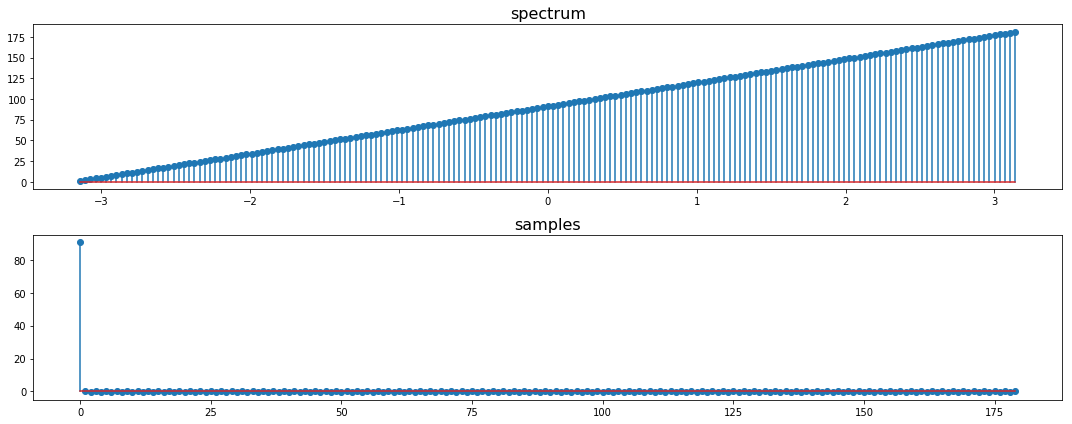

In [74]:
# x = DSP.delta(n)
# x = np.cos(np.pi*1/3*n)
# _ = Fourier.dtft(x)

X = np.arange(len(H)) + 1
x = Fourier.idtft(X)

In [75]:
samples = x

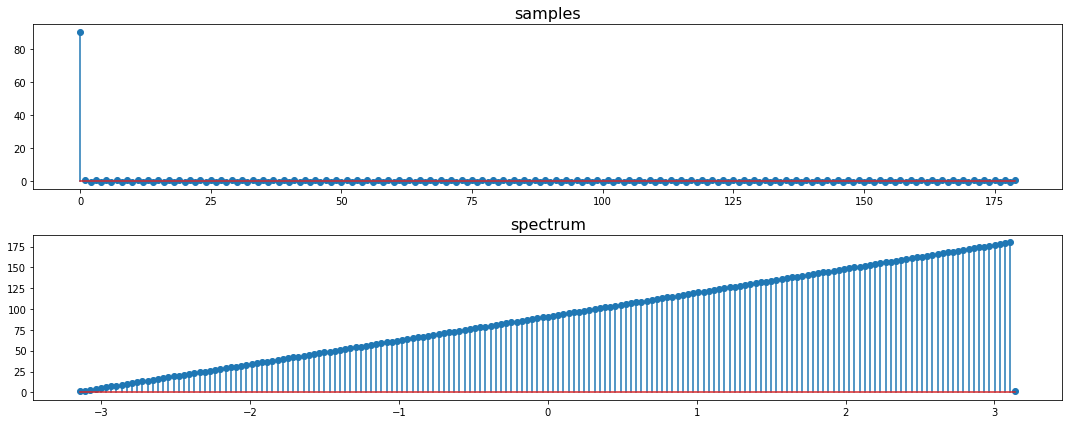

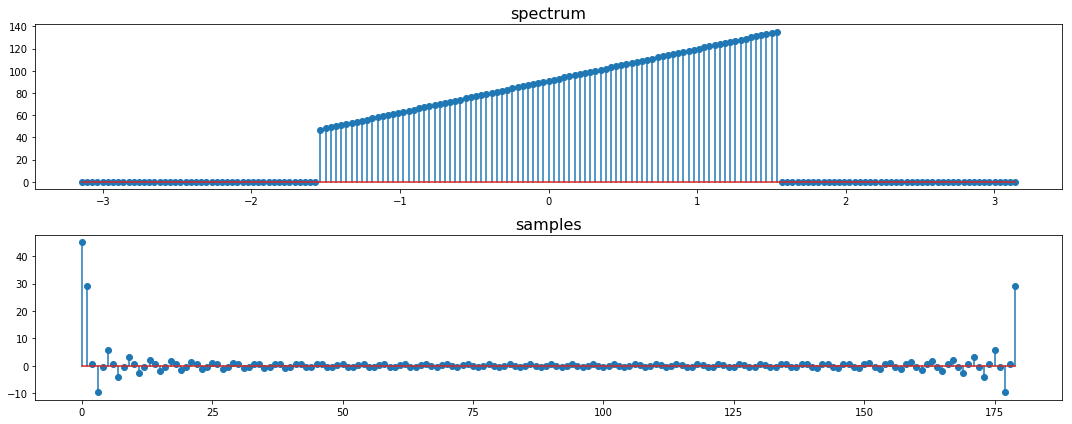

In [76]:
# low pass filter H

spectrum = Fourier.dtft(samples)
spectrum = spectrum * H
# X_cos = DSP.purify(X_cos)
samples = Fourier.idtft(spectrum)

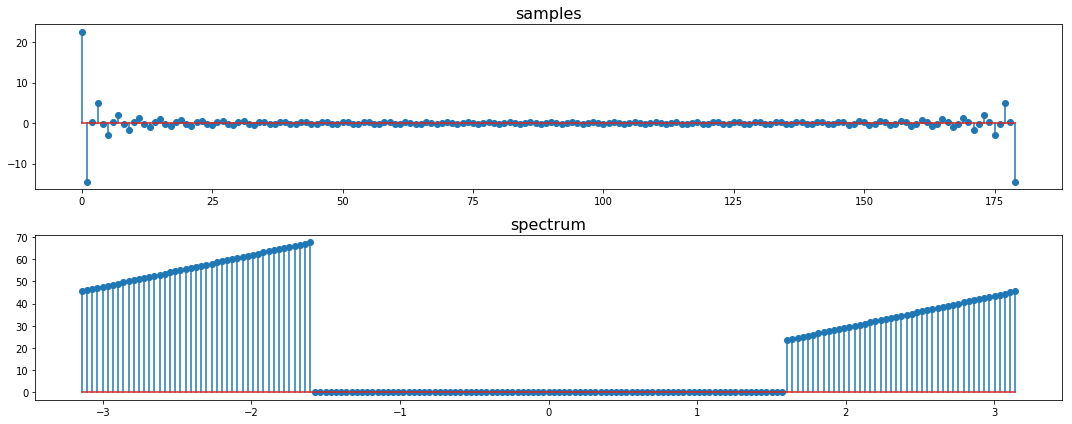

In [77]:
### cos modulation

# samples = samples * np.cos(np.pi/2*n)**2
samples = samples * (np.cos(np.pi*n))/2
spectrum = Fourier.dtft(samples)
# spectrum = DSP.purify(spectrum)

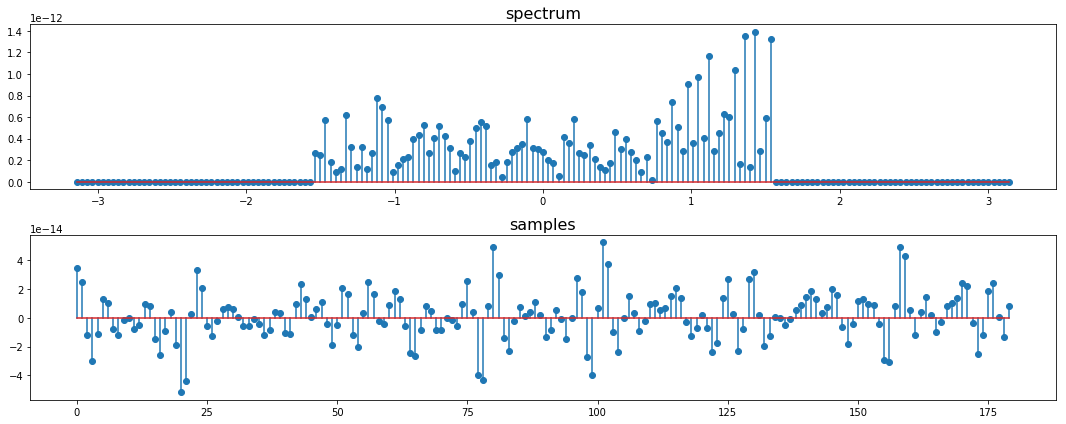

In [78]:
y1 = samples
Y2 = spectrum * H
# Y2 = DSP.purify(Y2)
y2 = Fourier.idtft(Y2)

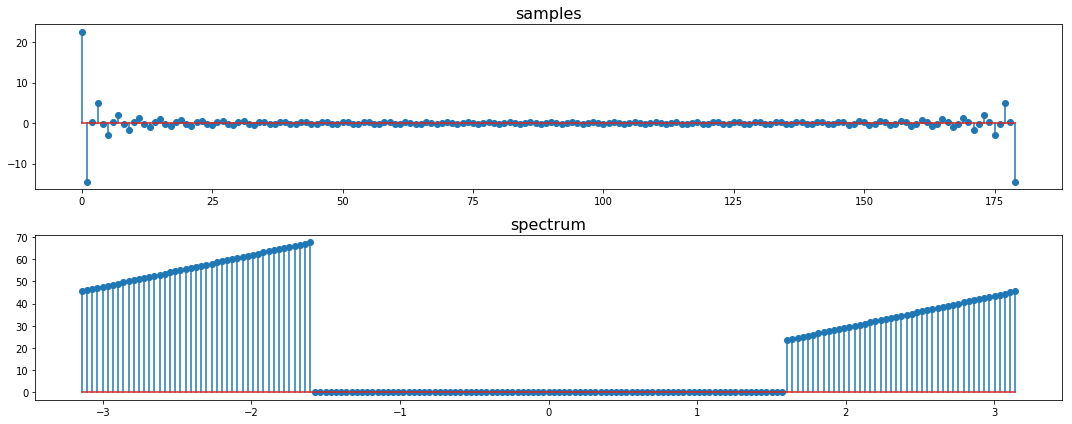

In [79]:
y = y1 - y2
Y = Fourier.dtft(y) 

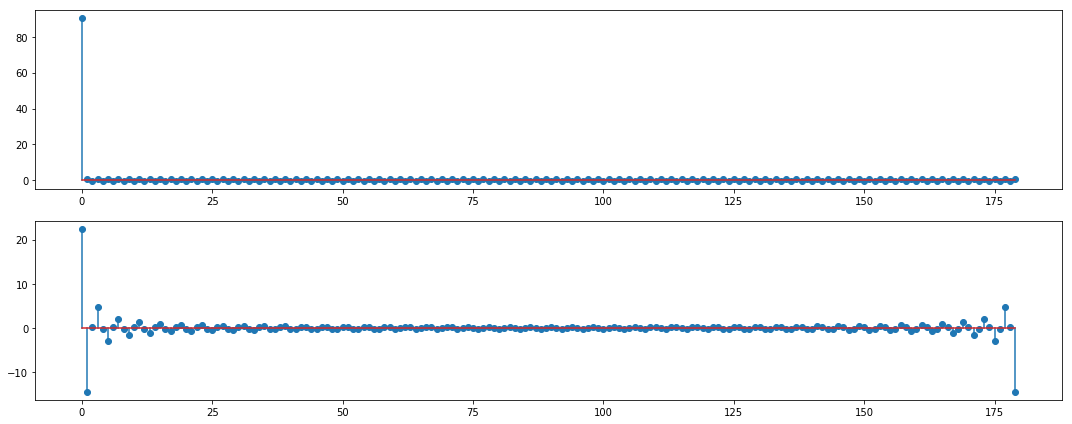

In [80]:
DSP.plot_comparison((x, y))

### x - x*h 的效果，減掉低通 等於是高通

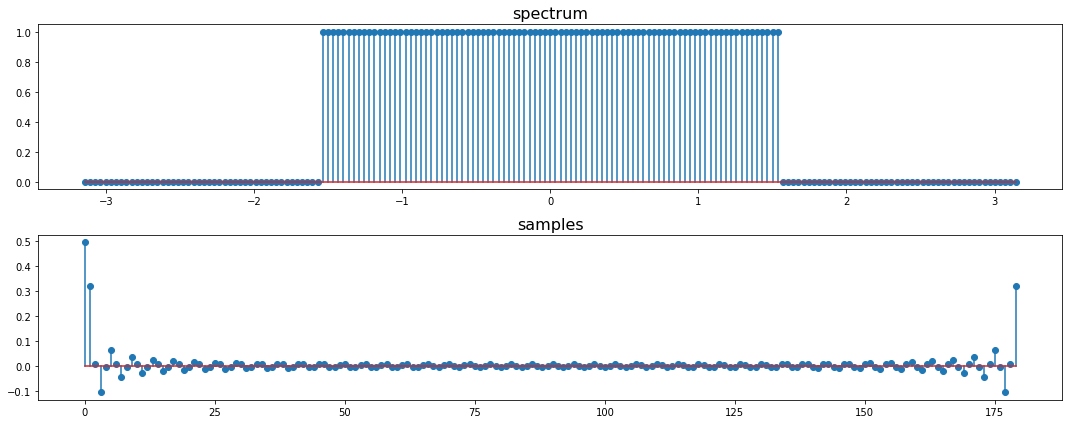

In [81]:
H = Filter.low_pass_filter_frequency_response(cutoff_ratio=1/2)
H = DSP.purify(H)
h = Fourier.idtft(H)

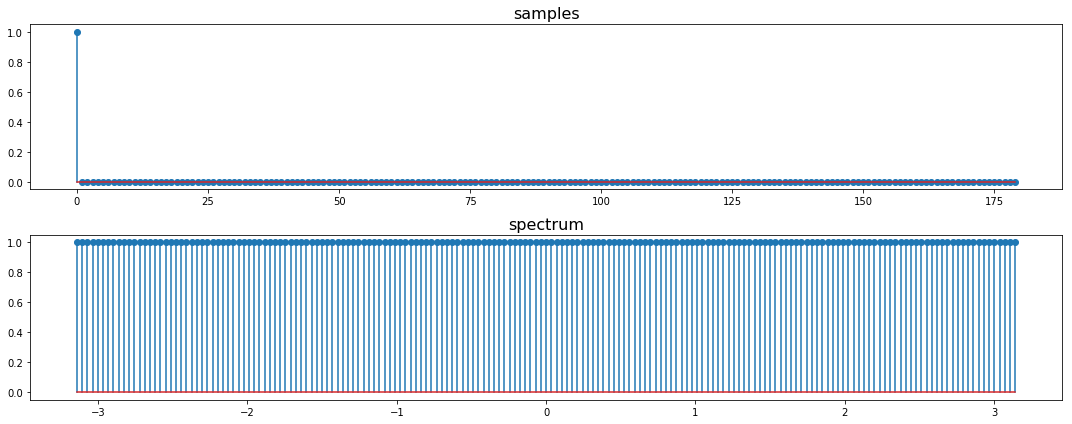

In [82]:
x = DSP.delta(n)
X = Fourier.dtft(x)

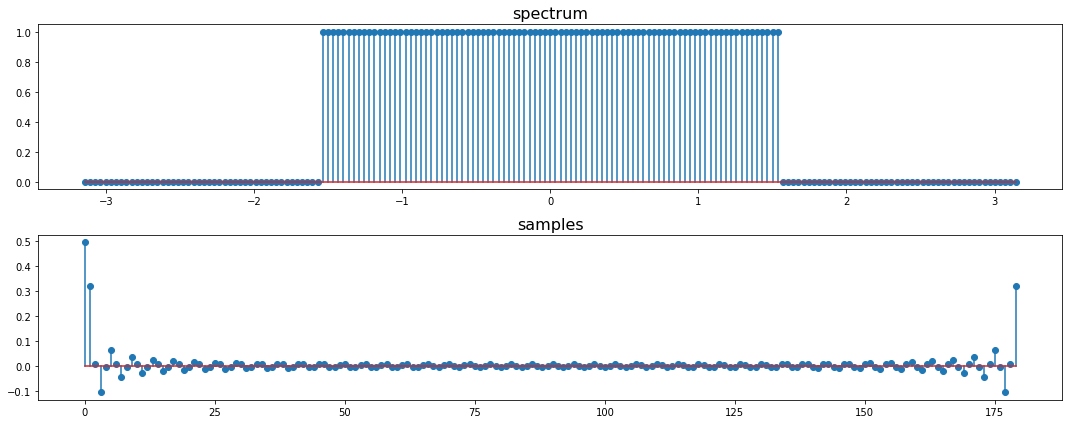

In [83]:
X1 = X * H
x1 = Fourier.idtft(X1)

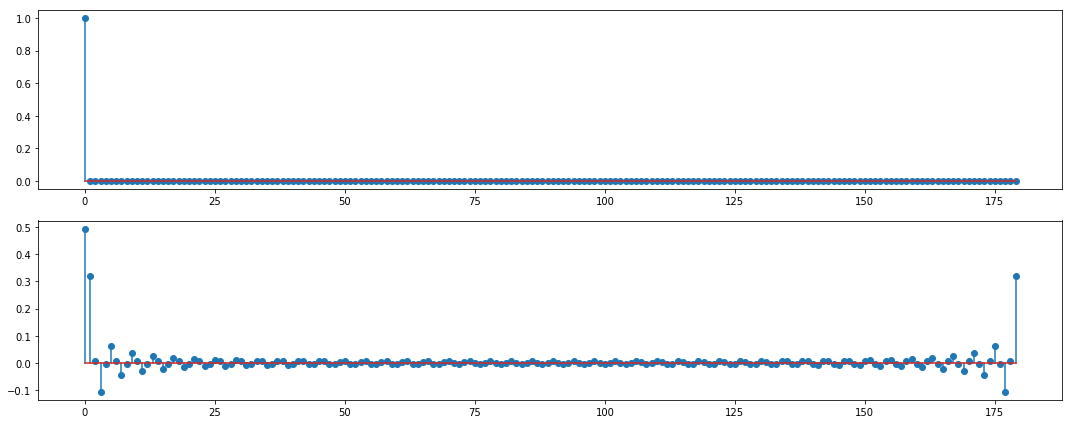

In [84]:
DSP.plot_comparison((x, x1))

### x - x1 = IDTFT(X - X1) !!!

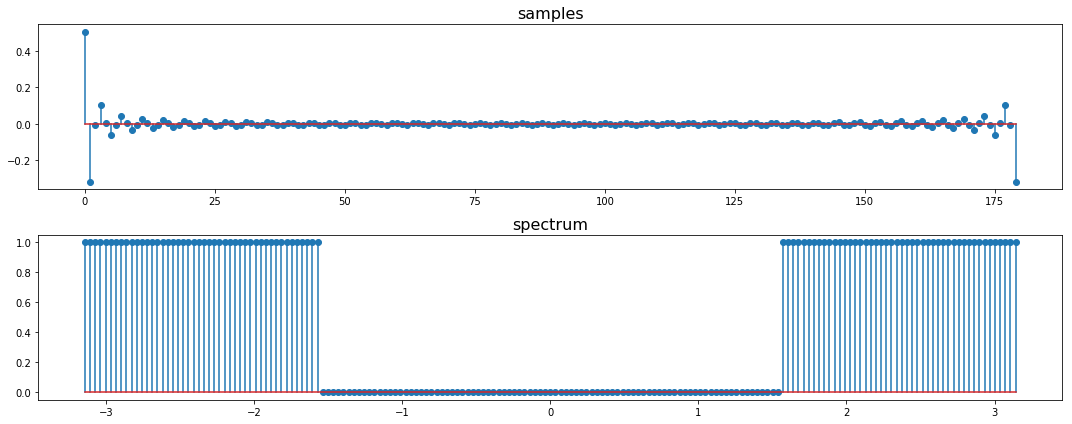

In [85]:
y = x - x1     
Y = Fourier.dtft(y)

# 15. 


![](https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/rdTC7mnOEeayyA4wl7sUBw_8711c1b230ccd92c413dc55be08da27e_Q1.png?expiry=1540598400000&hmac=MtJ6N5ukZRLoXUppx8KAi_6Kl1uAn6srHGFT2AUIMfc)

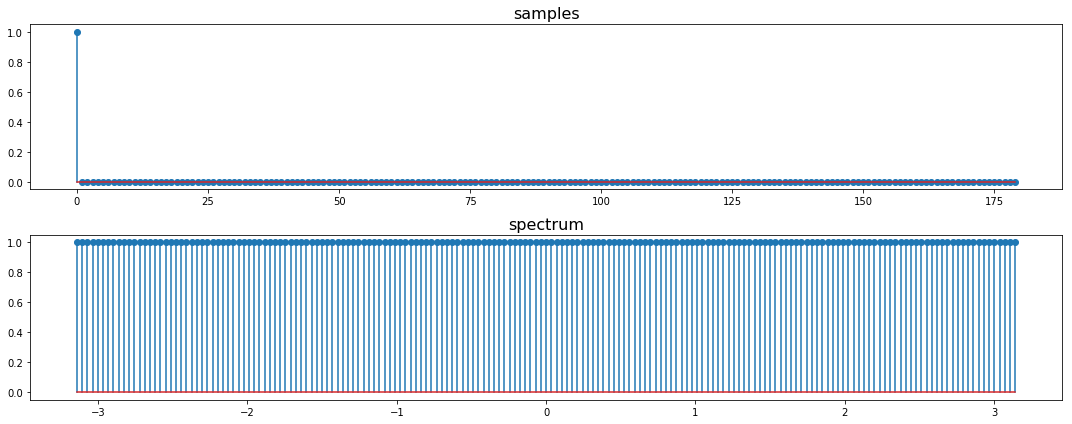

In [86]:
n = np.arange(N_SAMPLES)

x = DSP.delta(n)
X = Fourier.dtft(x)

samples = x
spectrum = X

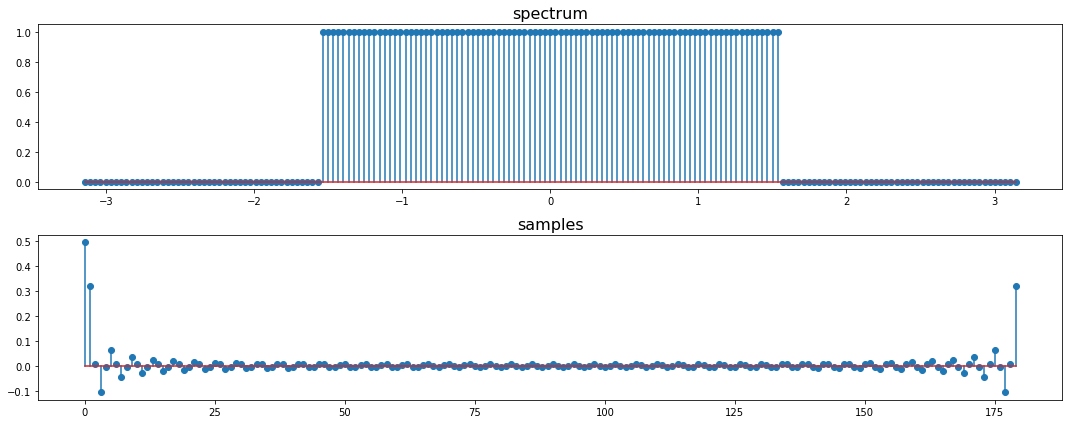

In [87]:
# half-band low pass filter

H = Filter.low_pass_filter_frequency_response(cutoff_ratio = 1/2)
spectrum = spectrum * H
samples = Fourier.idtft(spectrum, n_samples=len(n))

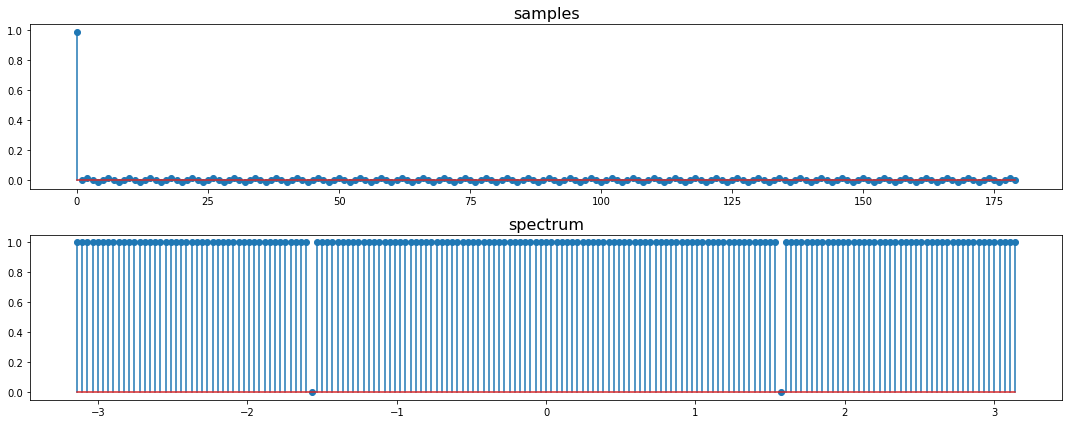

In [88]:
y1 = samples

flipper = (-1)**n
y2 = samples * flipper

y = y1 + y2
Y = Fourier.dtft(y)

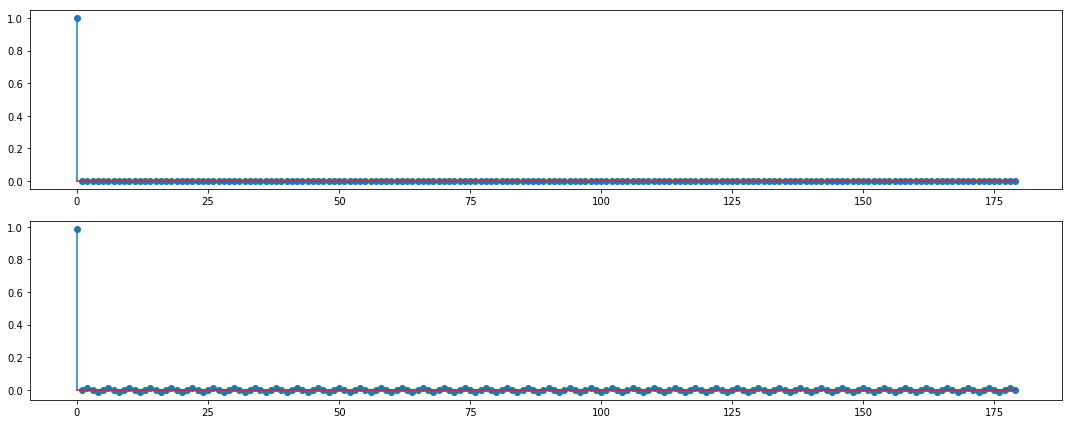

In [89]:
DSP.plot_comparison((x, y))